In [1]:
#STEPS ->
	#3 - Split the data into a training set and a test set (begin from here)
	#4 - Create a Model
	#5 - Check the output
	#6 - Improve

#TOOLS -> ['Numpy', 'Pandas', 'Scikit-learn', 'Matplotlib', 'Kaggle', 'Jupyter Notebook']	


In [2]:
from sklearn.datasets import load_iris
iris = load_iris() #data matrix

In [3]:
# store the feature matrix (X): input,  and response vector (y): output (pre labeled answers)
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names) 
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [5]:
	#4 - Create a Model

In [6]:
#KNN Classifier. Try changing the n_neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
	#5 - Check the output

In [8]:
#Accuracy of our model based on our test output and prediction output
from sklearn import metrics
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [9]:
	#6 - Improving the Dataset

In [10]:
from sklearn.tree import DecisionTreeClassifier
knn = DecisionTreeClassifier()
knn.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
	#7 - Check the output after trying to imporve it
#Accuracy of our model based on our test output and prediction output
from sklearn import metrics
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9


In [12]:
	#8 - Giving sample data and predicting it, which will of above-accuracy
sample = [[3,5,4,2], [2,3,5,4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions:", pred_species)

predictions: ['virginica', 'virginica']


In [13]:
#Model persistance is important. Next time we want to make a prediction we save a model to a file and use that file for predictions.
from sklearn.externals import joblib
joblib.dump(knn, 'mlbrain.joblib')

['mlbrain.joblib']

In [14]:
model = joblib.load('mlbrain.joblib')
model.predict(X_test)

array([2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 1, 1, 0, 2, 1, 1])

In [15]:
sample = [[3,5,4,2], [2,3,5,4]]
predictions = model.predict(sample) #this still works
pred_species = [iris.target_names[p] for p in predictions]
print("predictions:", pred_species)

predictions: ['virginica', 'virginica']


In [16]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()


<Figure size 500x400 with 2 Axes>

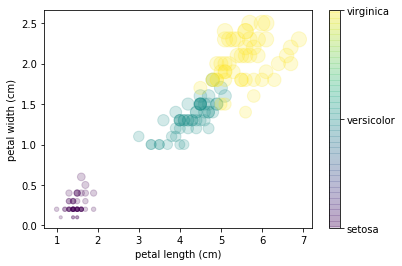

In [17]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)